In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('Employee_imbalanced.csv')
df.head()

,employee_id,first_name,last_name,age,gender,department,salary,expired_pto
0,1,John,Doe,35,Male,Marketing,50000,n
1,2,Jane,Smith,28,Female,Sales,60000,n
2,3,Michael,Johnson,42,Male,Finance,70000,n
3,4,Emily,Williams,31,Female,HR,55000,y
4,5,James,Brown,37,Male,Operations,65000,n


<Axes: xlabel='count', ylabel='expired_pto'>

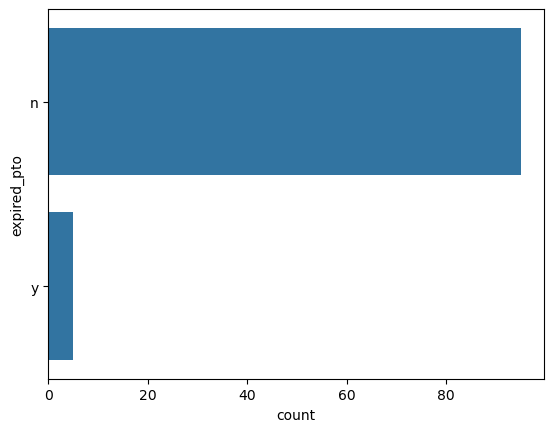

In [3]:
sb.countplot(df['expired_pto'])

In [7]:
pd.Series(df['expired_pto']).value_counts()

expired_pto
n    95
y     5
Name: count, dtype: int64

In [8]:
from sklearn.utils import resample
unexpired_pto = df[(df['expired_pto']=='n')]
expired_pto = df[(df['expired_pto']=='y')]
oversample = resample(expired_pto, replace=True, n_samples=99, random_state=40)
df_oversample = pd.concat([oversample, unexpired_pto])

In [9]:
df_oversample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 88 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  194 non-null    int64 
 1   first_name   194 non-null    object
 2   last_name    194 non-null    object
 3   age          194 non-null    int64 
 4   gender       194 non-null    object
 5   department   194 non-null    object
 6   salary       194 non-null    int64 
 7   expired_pto  194 non-null    object
dtypes: int64(3), object(5)
memory usage: 13.6+ KB


<Axes: xlabel='count', ylabel='expired_pto'>

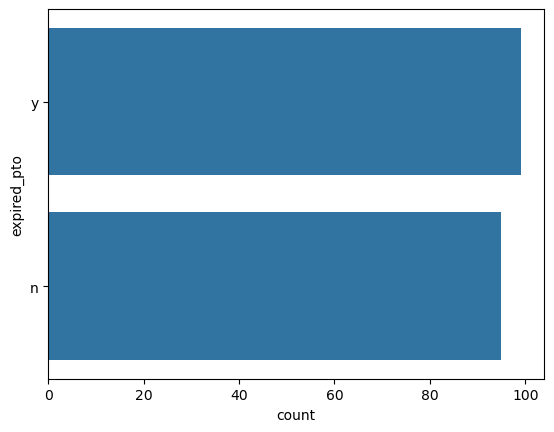

In [6]:
sb.countplot(df_oversample['expired_pto'])

In [10]:
pd.Series(df_oversample['expired_pto']).value_counts()

expired_pto
y    99
n    95
Name: count, dtype: int64

In [11]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.over_sampling import SMOTE
df2 = pd.read_csv("Employee_imbalanced.csv")
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)
X = df2[['age', 'salary']]
y = df2['expired_pto']
X

,age,salary
0,35,50000
1,28,60000
2,42,70000
3,31,55000
4,37,65000
...,...,...
95,29,132000
96,35,78000
97,26,95000
98,37,115000


In [14]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.count()

190

In [15]:
oversampled = pd.concat([pd.DataFrame(y_sm), pd.DataFrame(X_sm)], axis=1)
oversampled.head()


,expired_pto,age,salary
0,n,35,50000
1,n,28,60000
2,n,42,70000
3,y,31,55000
4,n,37,65000


In [16]:
pd.Series(oversampled['expired_pto']).value_counts()

expired_pto
n    95
y    95
Name: count, dtype: int64

In [17]:
pd.Series(df2['expired_pto']).value_counts()

expired_pto
n    95
y     5
Name: count, dtype: int64